# Исследование надежности заемщиков


## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [ ]:
import seaborn as sns
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [ ]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [ ]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [ ]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [ ]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [ ]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [ ]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [ ]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [ ]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [ ]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [ ]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [ ]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [ ]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [ ]:
data.duplicated().sum()

71

In [ ]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [ ]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [ ]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [ ]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [ ]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [ ]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [ ]:
dependence = data.groupby('children').agg({'debt': ['count', 'sum']})
dependence['correlation'] = round(dependence['debt', 'sum'] / dependence['debt', 'count'], 3)
dependence.sort_values(by='correlation', ascending=False)




debt       correlation
          count   sum            
children                         
4            41     4       0.098
2          2052   194       0.095
1          4808   444       0.092
3           330    27       0.082
0         14091  1063       0.075
5             9     0       0.000

<AxesSubplot:xlabel='children', ylabel='correlation'>

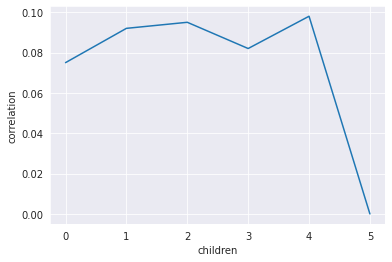

In [ ]:
sns.set_style('darkgrid')
sns.lineplot(data=dependence, x='children', y='correlation')

**Вывод:** Считаю, что клиентов с количеством детей 5, не стоит учитывать в исследовании, т.к. данных слишком мало, хоть и сама по себе категория не может быть на равне с другими, по причине того, что не часто втретишь человека с 5 детьми, я бы на показатели по этой категории не ориентировался. Если отбросить эту категорию клиентов, то некоторая закономерность в количестве детей и возвратности кредита, всё же наблюдается, хоть и небольшая. Люди с 4 детьми имеют наибольший процент невозвратности кредитов(здесь сразу вспоминается категория клиентов с 5 детьми, при наличии бОльших данных, возможно, платёжеспособность этой категории также упала), что обусловлено, скорее всего, высокой финансовой нагрузкой. У людей, которых нет детей, наибольшая возвратность кредитов, по причине их большей платёжеспособности. 2-3 ребёнка, показатели примерно равны, не много выбивается категория с 3 детьми.    

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [ ]:
dependence = data.groupby('family_status').agg({'debt': ['count', 'sum']})
dependence['correlation'] = round(dependence['debt', 'sum'] / dependence['debt', 'count'], 3)
dependence.sort_values(by='correlation', ascending=False)



debt      correlation
                       count  sum            
family_status                                
Не женат / не замужем   2796  273       0.098
гражданский брак        4134  385       0.093
женат / замужем        12261  927       0.076
в разводе               1189   84       0.071
вдовец / вдова           951   63       0.066

<AxesSubplot:xlabel='family_status', ylabel='correlation'>

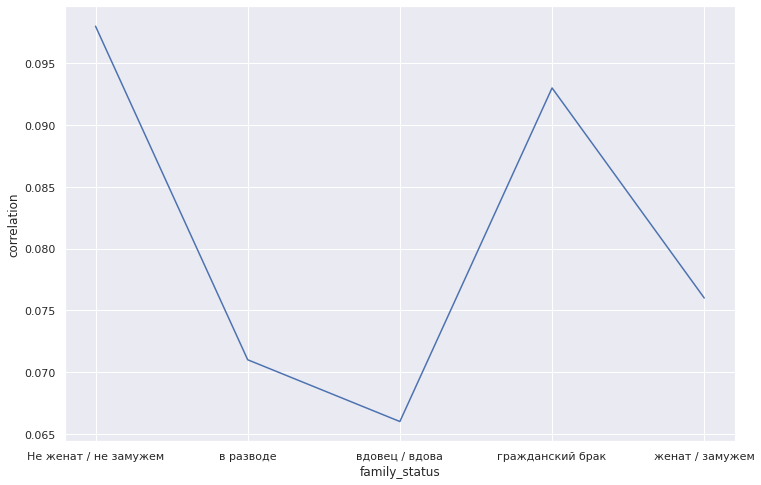

In [ ]:
sns.set(rc={'figure.figsize':(12,8)})
sns.set_style('darkgrid')
sns.lineplot(data=dependence, x='family_status', y='correlation')

**Вывод:** Наибольшая возвратность кредитов в категории клиентов не состоящих в официальном браке, но ранее имевших такой статус. Вероятно это связано с тем, что это более взрослые и состоятельные люди. Люди находящиеся в официальном браке, имеют средний показатель среди прочих, нелья однозначно сказать, это у этой категории хороший или плохой показатель, скорее всего не очень высокий показатель возвратности связан с тем, что люди данного статуса уже имеют детей, что создаёт дополнительные расходы, возможно у них есть другие кредитные обязательства, вполне вероятно ипотека и по причине этого, по другим кредитным продуктам допускаются просрочки. Самые низкие показатели у людей в официально не зарегистрированном браке и не состоящих в нём вовсе, возможно это относительно молодые люди, которые вероятно не имеют стабильного дохода. 

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [ ]:
dependence = data.groupby('total_income_category').agg({'debt': ['count', 'sum']})
dependence['correlation'] = round(dependence['debt', 'sum'] / dependence['debt', 'count'], 3)
dependence.sort_values(by='correlation', ascending=False)

debt       correlation
                       count   sum            
total_income_category                         
E                         22     2       0.091
C                      15921  1353       0.085
A                         25     2       0.080
B                       5014   354       0.071
D                        349    21       0.060

<AxesSubplot:xlabel='total_income_category', ylabel='correlation'>

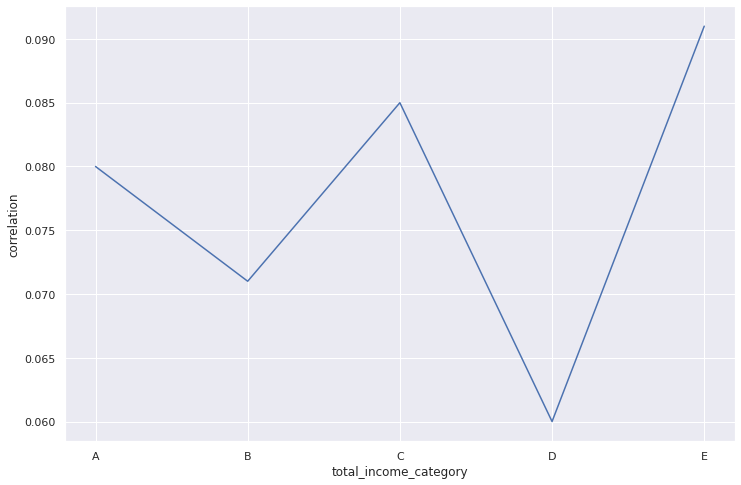

In [ ]:
sns.set_style('darkgrid')
sns.lineplot(data=dependence, x='total_income_category', y='correlation')

**Вывод:** Наибольшая вероятность возвратности кредита у категории D, скорее всего к данной категории относятся люди состоящие в браке, вероятно имеющие детей. Категории B, A, C имеют доход выше среднего, возможно это предприниматели, которые берут денежные средства для расчёта с контрагентами, развитие бизнеса и по причине возможных проблем с окупаемостью, иногда допускают просрочки. И конечно категория E имеет самую высокую вероятность не вернуть кредит в срок, что полностью обоснованно, т.к. данная категория имеет самый низкий уровень дохода. 

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

In [ ]:
dependence = data.groupby('purpose_category').agg({'debt': ['count', 'sum']})
dependence['correlation'] = round(dependence['debt', 'sum'] / dependence['debt', 'count'], 3)
dependence.sort_values(by='correlation', ascending=False)

debt      correlation
                          count  sum            
purpose_category                                
операции с автомобилем     4279  400       0.093
получение образования      3988  369       0.093
проведение свадьбы         2313  183       0.079
операции с недвижимостью  10751  780       0.073

<AxesSubplot:xlabel='purpose_category', ylabel='correlation'>

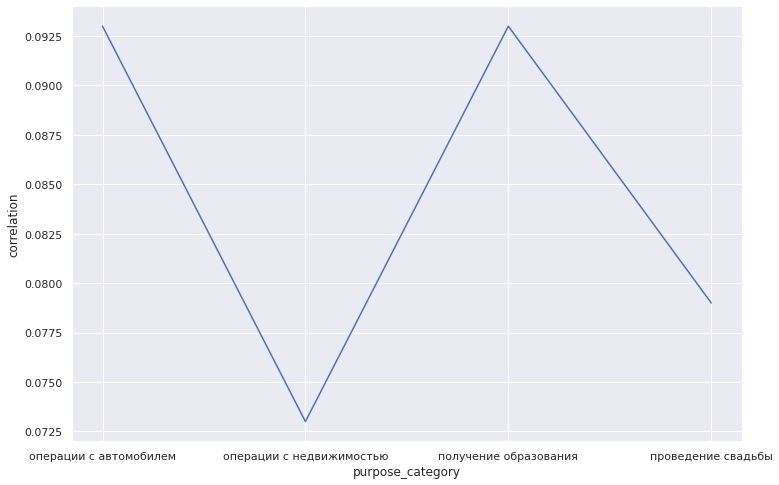

In [ ]:
sns.set_style('darkgrid')
sns.lineplot(data=dependence, x='purpose_category', y='correlation')

**Вывод:** Самая высокая вероятность оплаты в срок в категории 'операции с недвижимостью', это вполне логично, т.к. наиболее вероятно это ипотека и никто не захочет потерять имущество из-за просрочки, здесь ответственность за своевременность платежа гораздо выше, чем у какого-либо иного кредитного продукта. У категории 'проведение свадьбы' тоже достаточно не плохой показатель, скорее всего, связано это с погашением кредита досрочно, с денежных средств полученных в виде подарка. Категории 'операции с автомобилем' и 'получение образования' находятся на одном уровне. При получении кредита на образование, человек вероятно рассчитывает на успешное окончание учёбы, дальшее трудоустройство на высокооплачиваемую работу и расчёт с кредитором, но не всё идёт гладко. И последняя категория, авто может ломаться, челоку придётся нести дополнительные затраты на ремонт и облужавание авто, что скорее всего не учитывается им при заключении кредитного договора, из-за возникновения дополнительных непредвиденных расходов, человек не успевает платить в срок. 

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* Пропуски были в столбцах days_employed и total_income. Они взаимосвязаны, по этому, у нас было одинаковое кол-во пропусков в каждом. Пропущены значения в данных столбцах, были скорее всего по причине того, что человек брал небольшую сумму в кредит и банк не требовал подтверждения дохода и трудоустройства, по этому, эти поля можно было пропустить. 

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* У нас могут быть слишком выдающиеся значения и при подсчёт средного мы можем получить недостоверный результат. В таком случае лучше использовать медиану. 

### Шаг 4: общий вывод.

In [ ]:
data[data['children'] == 5]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
3979,5,1572.328285,42,среднее,1,гражданский брак,1,M,сотрудник,0,142594,на покупку своего автомобиля,C,операции с автомобилем
4397,5,3248.839837,36,среднее,1,женат / замужем,0,F,компаньон,0,168460,операции с недвижимостью,C,операции с недвижимостью
7866,5,773.124856,36,среднее,1,женат / замужем,0,F,сотрудник,0,48772,операции с жильем,D,операции с недвижимостью
15822,5,418.199982,31,среднее,1,женат / замужем,0,F,сотрудник,0,77552,сделка с подержанным автомобилем,C,операции с автомобилем
15916,5,2286.262752,37,среднее,1,женат / замужем,0,F,сотрудник,0,256698,покупка недвижимости,B,операции с недвижимостью
16211,5,387.317579,35,среднее,1,гражданский брак,1,F,госслужащий,0,126102,на проведение свадьбы,C,проведение свадьбы
20452,5,268.425464,38,начальное,3,женат / замужем,0,F,сотрудник,0,212545,заняться высшим образованием,B,получение образования
20837,5,2386.600221,35,среднее,1,женат / замужем,0,F,компаньон,0,204241,жилье,B,операции с недвижимостью
21156,5,1690.018117,59,среднее,1,женат / замужем,0,M,сотрудник,0,269068,операции со своей недвижимостью,B,операции с недвижимостью


Самая высокая возвратность кредитов у людей, у которых отсутствуют дети на иждивении(здесь я также придерживаюсь своего мнения об отсутствии необходимости учёта данных по людям с 5 детьми; очень смущает тот факт, что у людей с 4 детьми худший показатель по возвратности кредитов, в тоже время у людей с 5 детьми, полностью противоположный, думаю, их стоило бы учесть имея чуть больше данных. Учитывая другие показатели по таким людям, можно увидеть, что не все имеют высокий уровень дохода, кто-то со статусом 'гражданский брак' - где весьма не большой показетель возвратности, в том числе и цель получения кредита, есть категории в которых не самый хороший показетель по возврату), не состоящих в официальном браке, но ранее имевших такой статус, кредит на операции с недвижимостью и имеющими доход в пределах 50.000р. А вот скорее всего не вернёт кредит в срок, человек с 4 детьми на иждивении, не состоящий в официально зарегистрированном браке и низким уровнем дохода. 

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

Шикарный вывод и рекомендации для бизнеса. Кстати, хорошей практикой является написание в общем выводе всех твоих действий (кратко) по проекту. Ведь вывод раскрывает для заказчика всю твою проделанную работу и за что он платит деньги, даже если ему не интересен весь процесс исследования, то в отчёт он заглянет обязательно. Ты молодец!
</div>

<div style="border:solid blue 3px; padding: 20px">
<div class="alert alert-block alert-success">✔️
Комментарий от ревьюера №1 </b> 



У тебя получилась очень сильная и хорошая работа. Здорово, что не забываешь про комментарии, твой проект интересно проверять. 

---

Нужно поправить:

1) Ничего, отличная работа!)

----


Если у тебя будут какие-то вопросы по моим комментариям - обязательно пиши! Буду ждать работу на повторное ревью :)</div>